In [3]:
!git clone https://github.com/ishreya09/Automatic-Toll-Collection.git

Cloning into 'Automatic-Toll-Collection'...
remote: Enumerating objects: 1089, done.
remote: Counting objects: 100% (1020/1020), done.
remote: Compressing objects: 100% (398/398), done.
remote: Total 1089 (delta 8), reused 1020 (delta 8), pack-reused 69
Receiving objects: 100% (1089/1089), 49.72 MiB | 37.55 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [4]:
!pip install -r /kaggle/working/Automatic-Toll-Collection/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=cdf9da342b89d53205bd32ca8f2d6fc9abd58a61f7148dc10333fd55957526d3
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.72
    Uninstalling ultralytics-8.2.72:
      Successfully uninstalled ultralytics-8.2.72


In [5]:
!pip install -U ultralytics

  Using cached ultralytics-8.2.72-py3-none-any.whl.metadata (41 kB)
Using cached ultralytics-8.2.72-py3-none-any.whl (863 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3


In [6]:
from ultralytics import YOLO

# Load your model
model = YOLO('/kaggle/working/Automatic-Toll-Collection/best.pt')


In [7]:
# Perform inference

video_path = '/kaggle/working/Automatic-Toll-Collection/demo.mp4'

# Perform inference and save results to a specific directory
results = model.predict(video_path, save=True, save_dir='/kaggle/output/Automatic-Toll-Collection/runs/detect/predict',stream= True)


In [8]:
results

<generator object BasePredictor.stream_inference at 0x7b8068830890>

In [12]:
# import cv2
# import pytesseract
# from ultralytics import YOLO

# # Configure the path to the Tesseract executable
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Update this path if needed

# # Load YOLO model
# model = YOLO('/kaggle/working/Automatic-Toll-Collection/best.pt')

# # Load video
# video_path = "/kaggle/working/Automatic-Toll-Collection/demo.mp4"
# cap = cv2.VideoCapture(video_path)

# # Define codec and create VideoWriter object to save output video
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('/kaggle/output/Automatic-Toll-Collection/output.avi', fourcc, 20.0, 
#                       (int(cap.get(3)), int(cap.get(4))))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Perform inference on the current frame
#     results = model(frame)

#     # Process each result
#     for result in results:
#         # Access the boxes
#         boxes = result.boxes.xyxy.cpu().numpy()  # Convert to numpy array
#         for box in boxes:
#             x1, y1, x2, y2 = map(int, box)
#             plate_image = frame[y1:y2, x1:x2]

#             # Perform OCR on the detected plate
#             plate_text = pytesseract.image_to_string(plate_image, config='--psm 8').strip()
#             if plate_text:
#                 print(f'Detected Plate: {plate_text}')
#                 # Draw bounding box and text
#                 cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
#                 cv2.putText(frame, plate_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

#     # Write the frame to the output video
#     out.write(frame)

# # Release video capture and writer objects
# cap.release()
# out.release()

# # No need for cv2.destroyAllWindows() on Kaggle


In [16]:
import cv2
import pytesseract
from ultralytics import YOLO

# Configure the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Update this path if needed

# Load YOLO model
model = YOLO('/kaggle/working/Automatic-Toll-Collection/best.pt')

# Load video
video_path = "/kaggle/working/Automatic-Toll-Collection/demo.mp4"
cap = cv2.VideoCapture(video_path)

# Define codec and create VideoWriter object to save output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = '/kaggle/working/Automatic-Toll-Collection/output.avi'
out = cv2.VideoWriter(output_path, fourcc, 20.0, 
                      (int(cap.get(3)), int(cap.get(4))))

license_plates=[]
license_plates_images=[]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the current frame
    results = model(frame)

    # Process each result
    for result in results:
        # Access the boxes
        boxes = result.boxes.xyxy.cpu().numpy()  # Convert to numpy array
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            plate_image = frame[y1:y2, x1:x2]
            license_plates_images.append(plate_image)
            # Perform OCR on the detected plate
            plate_text = pytesseract.image_to_string(plate_image, config='--psm 8').strip()
            if plate_text:
                print(f'Detected Plate: {plate_text}')
                license_plates.append(plate_text)
                # Draw bounding box and text
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, plate_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Write the frame to the output video
    out.write(frame)

# Release video capture and writer objects
cap.release()
out.release()

print(f'Processed video saved to: {output_path}')



0: 416x640 1 License Plate, 88.2ms
Speed: 3.6ms preprocess, 88.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected Plate: P R-183-JF |

0: 416x640 1 License Plate, 89.6ms
Speed: 3.9ms preprocess, 89.6ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected Plate: Pe R-183-JF |

0: 416x640 1 License Plate, 91.5ms
Speed: 3.6ms preprocess, 91.5ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
Detected Plate: Ee R-183-JF |

0: 416x640 1 License Plate, 93.3ms
Speed: 3.9ms preprocess, 93.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Detected Plate: P R-183-JF |

0: 416x640 1 License Plate, 92.7ms
Speed: 3.7ms preprocess, 92.7ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
Detected Plate: Pe R-183-JE |

0: 416x640 1 License Plate, 90.4ms
Speed: 3.7ms preprocess, 90.4ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
Detected Plate: R-183-JF |

0: 416x640 1 License Plate

## Have to preprocess the plate numbers

1. Remove Special Characters
2. Remove Spaces
3. Remove Numbers at the Start (Assuming Numbers don't appear in the beginning)
4. Capitalize All Alphabets
5. Ensure uniqueness 
6. Remove length less than or equal to 2





In [18]:
print(license_plates)

['P R-183-JF |', 'Pe R-183-JF |', 'Ee R-183-JF |', 'P R-183-JF |', 'Pe R-183-JE |', 'R-183-JF |', 'FP R-183-JF |', 'P R-183-JF |', 'B R-183-JF |', 'Y R-183-JF |', 'F R-183-JF |', 'Y R-183-JF |', '| R-183-JF |', 'F R-183-JF |', 'R-183-JF |', 'F R-1B3-JF |', 'F R-183-JF |', '| R-1B3-JF |', '+ R-183-JF', 'R-183-JF |', '| R-183-JF |', 'F R-183-JF |', '} R1B3-JF |', 'F R-183-JF |', '} R-183-JF |', 'F R-183-JF |', '| R-183-JF |', 'P R-183-JF |', 'PH R-183-JF |', 'P_R-183-JF |', 'R-183-JF |', 'PM R-183-JF |', 'P R-183-JF |', 'R-183-JF |', 'F R-183-JF |', 'F R-183-JF |', 'R-183-JF |', 'R-183-JF |', 'F R-183-JF |', 'F, R-183-JF |', 'F R-183-5F |', 'b R-183-JF |', 'F R-183-JF |', 'P R-183-JF |', 'H R-183-JF |', 'F RAB3-JF |', '~ R183-5F |', '- R-183-JF |', '— RAB3-JF |', 'RABE |', 'P RABL IE |', 'P RABID |', 'RABI IF |', 'P RABIIF |', 'PO RAGIIF |', '| RABIIF |', 'F RABIIE |', 'pee]', 'Pees Jt)', 'Peete |', 'sl', 'a', 'Fe see-24 |', '<i)', 'F wee JY |', 'Pees', 'F -e94-J9 |', 'PW SS4-J9 |', 'F W

In [23]:
import re

def process_license_plate(plate):
    # Remove special characters (keeping only alphanumeric characters and hyphens)
    plate = re.sub(r'[^A-Za-z0-9]', '', plate)
    
    # Remove spaces
    plate = plate.replace(' ', '')
    
    # Remove numbers at the start
    plate = re.sub(r'^\d+', '', plate)
    
    # Capitalize all alphabets
    plate = plate.upper()
    
    return plate


# Process each license plate
processed_plates = [process_license_plate(plate) for plate in license_plates]

# Remove duplicates by converting to a set and back to a list
unique_plates = list(set(processed_plates))

# Remove strings with length less than or equal to 2
filtered_plates = [plate for plate in unique_plates if len(plate) > 2]

# Print the filtered list
print(filtered_plates)


['LL605H7', 'PL605H7', 'PREE', 'RL6958Z', 'FEK884RS', 'FW89419', 'F66HH07', 'PW89S1', 'RFL656XH', 'R197G3', 'PRES', 'FK884RS', 'FR99CE', 'EXS844', 'LS7GE', 'BNL656XH', 'FRABIIE', 'PH844LX', 'FL605Z', 'PEES', 'H644LX', 'PORAGIIF', 'EK884RS', 'RAB3JF', 'FR1B3JF', 'L605HZ', 'PFL69SHZ', 'FN8941', 'HH07', 'YL605HZ', 'BEL60SZ', 'PWSS4J9', 'RWL656KH', 'YR183JF', 'L656XH', 'R1835F', 'RHK884RS', 'PFN894JV', 'IK884RS', 'FFK884RS', 'LRS7CE', 'MSH644LX', 'BE5057', 'TK884RS', 'PR183JF', 'R1STGA', 'HR183JF', 'PI644LX', 'L257CE', 'FK884R5', 'PYH644LX', 'FWEEJY', 'PER183JE', 'PRABLIE', 'YN8945', 'R19763', 'MK884RS', 'FN894JV', 'EL656XH', 'RL656XH', 'HHO', 'FW894J9', 'MTL656XH', 'BL605H7', 'MYL656XH', 'FTK884RS', 'LL60SHZ', 'PMR183JF', 'MTL656KH', 'TL6S6XKH', 'PHR183JF', 'L605H7Z', 'EL605HZ', 'PL656XH', 'PH644LX', 'ER19763', 'YL605Z', 'FS951', 'RH644LX', 'PEEOUL', 'PGOHHOF', 'FFL656XXH', 'R183JF', 'LH644LX', 'NK884RS', 'FRAB3JF', 'YN894J', 'TRO', 'FL605HZ', 'PEE', 'FPR183JF', 'N894JV', 'HHO7', 'L656XK'

### These numbers can be sent to the database and checked if it matches or not and charge a toll for it

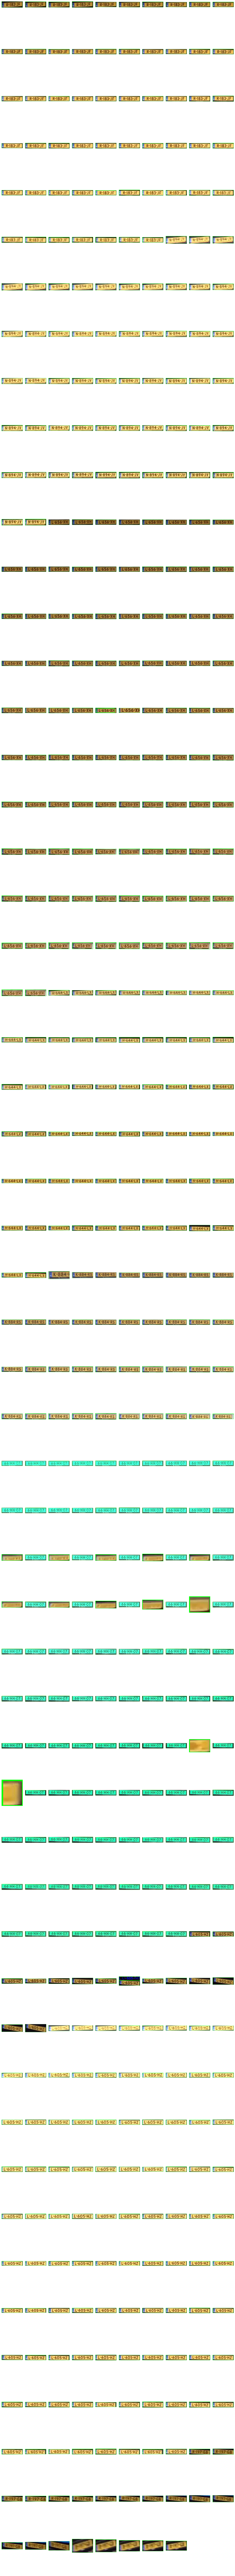

In [26]:
import matplotlib.pyplot as plt

# Plot license plate images
if license_plates_images:
    # Number of images
    num_images = len(license_plates_images)
    
    # Determine grid size (adjust as necessary)
    cols = 10
    rows = (num_images + cols - 1) // cols
    
    # Create a figure
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each image
    for img, ax in zip(license_plates_images, axes):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    
    # Hide any unused subplots
    for ax in axes[num_images:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()